In [3]:
%cd D:\Github\rf-analysis-tools
from __future__ import division, absolute_import, print_function
%matplotlib inline

import lmfit
import matplotlib.pyplot as plt
import numpy as np
%cd D:\Github\rf-analysis-tools\src\resonator
from resonator import circuit
import numpy as np
import pandas as pd
from IPython.display import display
import numpy as np
import xarray as xr
import holoviews as hv

from qcodes import initialise_or_create_database_at, load_by_run_spec
choose = np.max

import pandas as pd
from resonator import background, reflection, see , shunt

D:\Github\rf-analysis-tools
D:\Github\rf-analysis-tools\src\resonator


In [4]:
initialise_or_create_database_at(
    r"D:\Github\Qinu\qumin\data\2025-08-28-C12-037-C-C12-037-H.db"
)

In [5]:
peak1 = load_by_run_spec(captured_run_id=10).to_xarray_dataset().sel({'pna_power':-30})

In [6]:
    frequency=peak1["pna_frequency_axis"].to_numpy(),
    data=peak1["pna_tr1_linear_magnitude"].to_numpy(),
    * np.exp(1j * np.pi * peak1["pna_tr1_unwrapped_phase"].to_numpy() / 180),

(np.complex128(0.9283647521344712+0.37167040101991156j),
 np.complex128(0.927643178558474+0.37346771383070193j),
 np.complex128(0.9299379964072725+0.36771636193950863j),
 np.complex128(0.9298571582143977+0.3679207323832738j),
 np.complex128(0.9314104459474016+0.3639705773549044j),
 np.complex128(0.9289862174319858+0.3701143172337585j),
 np.complex128(0.9283799821817488+0.37163235688542484j),
 np.complex128(0.9292833322843624+0.369367687187809j),
 np.complex128(0.929666443856037+0.36840236585569036j),
 np.complex128(0.9262614517460158+0.3768815769036254j),
 np.complex128(0.927649991446201+0.37345079109551144j),
 np.complex128(0.9278610874891066+0.372926001136328j),
 np.complex128(0.9267709943514931+0.3756268414646971j),
 np.complex128(0.9280356084734966+0.37249148903730256j),
 np.complex128(0.9250978782381084+0.37972873960150805j),
 np.complex128(0.9299359888532037+0.3677214389121393j),
 np.complex128(0.9260605057206647+0.3773750650803345j),
 np.complex128(0.9271850018457982+0.374603753

In [ ]:
# resonator = reflection.KerrReflectionFitter(frequency=frequency, data=data, choose=choose)
# resonator = shunt.KerrShuntFitter(frequency=frequency, data=data, choose=choose)
# r = resonator = reflection.LinearReflectionFitter(frequency=frequency, data=data, background_model=background.MagnitudePhaseDelay())
resonator = shunt.LinearShuntFitter(frequency=frequency, data=data,
                              background_model=background.MagnitudeSlopeOffsetPhaseDelay())
print(resonator.result.fit_report())

In [ ]:
fig, (ax_raw, ax_norm) = plt.subplots(1, 2, figsize=(6, 3), dpi=300)  # Adjust these values for your plot settings
ax_raw.set_title('measurement plane')
ax_norm.set_title('resonator plane')
see.real_and_imaginary(resonator=resonator, axes=ax_raw, normalize=False)
see.real_and_imaginary(resonator=resonator, axes=ax_norm, normalize=True)
ax_raw.legend(handles=ax_raw.lines, labels=('data', 'fit', 'resonance'), fontsize='xx-small');

In [ ]:
fig, axes = plt.subplots(2, 2, sharex='all', figsize=(6, 6), dpi=300)  # Adjust these values for your plot settings
ax_raw_mag, ax_norm_mag, ax_raw_phase, ax_norm_phase = axes.flatten()
ax_raw_mag.set_title('measurement plane')
ax_norm_mag.set_title('resonator plane')
ax_raw_phase.set_title('measurement plane')
ax_norm_phase.set_title('resonator plane')
see.magnitude_vs_frequency(resonator=resonator, axes=ax_raw_mag, normalize=False, frequency_scale=1e-9)
see.magnitude_vs_frequency(resonator=resonator, axes=ax_norm_mag, normalize=True, frequency_scale=1e-9)
see.phase_vs_frequency(resonator=resonator, axes=ax_raw_phase, normalize=False, frequency_scale=1e-9)
see.phase_vs_frequency(resonator=resonator, axes=ax_norm_phase, normalize=True, frequency_scale=1e-9);

In [ ]:
fig, (ax_magnitude, ax_phase, ax_complex) = see.triptych(resonator=r, plot_initial=True, frequency_scale=1e-6, figure_settings={'figsize': (6, 3), 'dpi': 300})
ax_complex.legend();

In [ ]:
print("The internal quality factor is Q_i = {:.0f}".format(r.Q_i))
print("The total quality factor is Q_t = {:.0f}".format(r.Q_t))
print("The standard error of the resonance frequency is: {:.0f} Hz".format(r.f_r_error))
print("The total energy decay rate is 2 pi f_r / Q_t = {:.0f} s^-1".format(r.total_energy_decay_rate))

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / Hz')
ax.set_ylabel(r'photon number $\bar{n}$')
ax.plot(f, resonator.photon_number(input_frequency=f, input_rate=resonator.f_r), label='max')
# Calculate the photon number using another root-finding function that selects the minimum Kerr detuning.
# Since the Kerr coefficient is negative here the Kerr detuning is also negative, so choosing the minimum
# (most negative) detuning corresponds to choosing the maximum photon number.
ax.plot(f, resonator.photon_number(input_frequency=f, input_rate=resonator.f_r, choose=np.min), label='min')
ax.legend()
ax.set_xlim(f_r - 2e5, f_r + 1e5);

In [56]:
from __future__ import division, absolute_import, print_function
%matplotlib inline
from resonator import circuit
import numpy as np
import pandas as pd
from IPython.display import display
import numpy as np
import xarray as xr
import holoviews as hv

from qcodes import initialise_or_create_database_at, load_by_run_spec

import lmfit

%cd D:\Github\rf-analysis-tools\src
from __future__ import division, absolute_import, print_function
from __future__ import division, absolute_import, print_function
%matplotlib inline

from resonator import background, see, shunt
%matplotlib inline

import matplotlib.pyplot as plt

from resonator import background, reflection, see,kerr

D:\Github\rf-analysis-tools\src


In [2]:
# Make some fake data to use for the example fits
# f_r = 1e9
# frequency = np.linspace(f_r - 1e6, f_r + 1e6, 501)
# bg = background.MagnitudePhase().func(frequency=frequency, magnitude=0.01, phase=np.pi / 3)
# fg = reflection.LinearReflection().func(frequency=frequency, resonance_frequency=f_r, internal_loss=1e-5, coupling_loss=5e-5)
# data = bg * fg + 0.0002 * (np.random.randn(frequency.size) + 1j * np.random.randn(frequency.size))
initialise_or_create_database_at(
    r"D:\Github\Qinu\qumin\data\2025-08-28-C12-037-C-C12-037-H.db"
)

In [23]:
peak1 = load_by_run_spec(captured_run_id=7).to_xarray_dataset().sel({'pna_power':-30})
# port3 = circuit.notch_port(
#     f_data=peak1["pna_frequency_axis"],
#     z_data_raw=peak1["pna_tr1_linear_magnitude"]
#     * np.exp(1j * np.pi * peak1["pna_tr1_unwrapped_phase"] / 180),
# )

frequency = peak1["pna_frequency_axis"].to_numpy()
data = peak1["pna_tr1_linear_magnitude"].to_numpy() * np.exp(1j * np.pi * peak1["pna_tr1_unwrapped_phase"].to_numpy() / 180)

## Use initial params to improve on the guessing function

The default algorithm used by `lmfit` is Levenberg-Marquardt, which is fast but finds only the local minimum of the residual function given by the initial values. The most common reason for a fit to fail is that the `guess` function provides initial values that are in a local minimum that is not the global minimum. If a data set that looks "reasonable" fails to converge to the correct values, a quick fix is to try different initial values. If best-fit parameters from a previous successful fit are available and the data to be fit is similar, this same technique can be used to accelerate the fit or achieve convergence.

[[Model]]
    (Model(magnitude_phase) * Model(linear_reflection))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 62
    # data points      = 20002
    # variables        = 5
    chi-square         = 123.882746
    reduced chi-square = 0.00619507
    Akaike info crit   = -101685.209
    Bayesian info crit = -101645.691
    R-squared          = np.complex128(2.1287607030181132e+16+7162501990072601j)
[[Variables]]
    magnitude:            0.21974079 +/- 1662.37635 (756516.98%) (init = 0.2716878)
    phase:                1.23700740 +/- 19860970.2 (1605565994.47%) (init = 1.200897)
    resonance_frequency: -4.5020e+12 +/- 1.7442e+21 (38742552552.55%) (init = 1e+09)
    coupling_loss:        0.05138768 +/- 19876159.2 (38678839063.39%) (init = 0.0002463632)
    internal_loss:        5.0095e-04 +/- 128812.960 (25713509619.97%) (init = 0.0001125792)
[[Correlations]] (unreported correlations are < 0.100)
    C(phase, coupling_loss)               = +1.0000
    C(ph

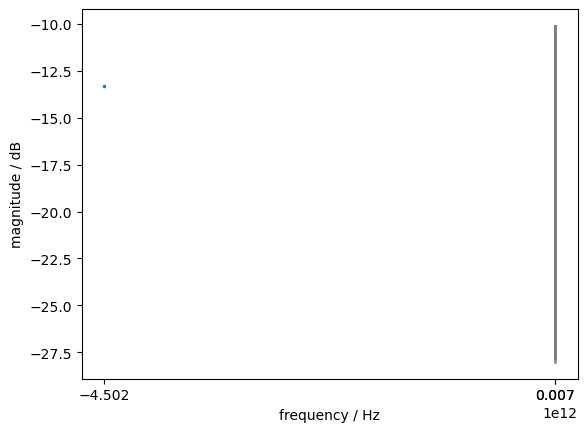

In [24]:
params = lmfit.Parameters()
params.add(name='resonance_frequency', value=1e9) 
r = reflection.LinearReflectionFitter(frequency=frequency, data=data, params=params)
fig, ax = see.magnitude_vs_frequency(resonator=r)
print(r.result.fit_report())

In [12]:
peak1["pna_frequency_axis"].to_numpy()


array([7.8765000e+09, 7.8765005e+09, 7.8765010e+09, ..., 7.8814990e+09,
       7.8814995e+09, 7.8815000e+09], shape=(10001,))

## Use initial parameters to control whether or not to vary a parameter in the fit

For example, the value of the coupling can be fixed to a value from a simulation. 

[[Model]]
    (Model(magnitude_phase) * Model(linear_reflection))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 108
    # data points      = 20002
    # variables        = 5
    chi-square         = 58.0111729
    reduced chi-square = 0.00290099
    Akaike info crit   = -116860.724
    Bayesian info crit = -116821.206
    R-squared          = np.complex128(-2.1604301206813584e+16+2.315924020175953e+16j)
[[Variables]]
    magnitude:            0.26011244 +/- 6.7419e-04 (0.26%) (init = 0.2716878)
    phase:                1.21994883 +/- 0.00237758 (0.19%) (init = 1.200897)
    resonance_frequency:  6.9326e+09 +/- 2842.33323 (0.00%) (init = 6.932867e+09)
    coupling_loss:        3.9401e-05 +/- 3.8499e-07 (0.98%) (init = 5e-05)
    internal_loss:        6.0814e-05 +/- 1.0637e-06 (1.75%) (init = 0.0001125792)
[[Correlations]] (unreported correlations are < 0.100)
    C(coupling_loss, internal_loss) = +0.6368
    C(magnitude, internal_loss)     = +0.4198
    C

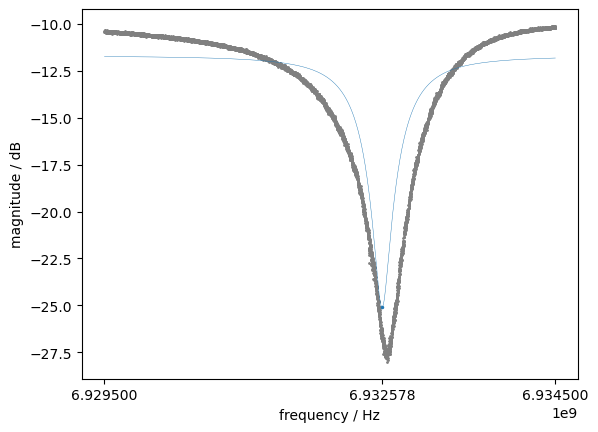

In [27]:
params = lmfit.Parameters()
params.add(name='coupling_loss', value=5e-5, vary=True)
r = reflection.LinearReflectionFitter(frequency=frequency, data=data, params=params)
fig, ax = see.magnitude_vs_frequency(resonator=r)
print(r.result.fit_report())  # Note that coupling_loss is now fixed

Fit the model to the data using a KerrReflectionFitter

In [64]:
choose = np.max
# resonator = reflection.KerrReflectionFitter(frequency=frequency, data=data, choose=choose)
# resonator = shunt.KerrShuntFitter(frequency=frequency, data=data, choose=choose)
resonator = shunt.LinearShuntFitter(frequency=frequency, data=data,
                              background_model=background.MagnitudeSlopeOffsetPhaseDelay())
# resonator = reflection.LinearReflectionFitter(frequency=frequency, data=data, background_model=background.MagnitudePhaseDelay())
print(resonator.result.fit_report())  # result is a lmfit.model.ModelResult object

[[Model]]
    (Model(magnitude_slope_offset_phase_delay) * Model(linear_shunt))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 55
    # data points      = 20002
    # variables        = 8
    chi-square         = 0.03808864
    reduced chi-square = 1.9050e-06
    Akaike info crit   = -263438.879
    Bayesian info crit = -263375.650
    R-squared          = np.complex128(-201893361890.44568-3121557801279.9106j)
[[Variables]]
    frequency_reference:  6.932e+09 (fixed)
    magnitude_slope:     -2.6448e-09 +/- 1.7758e-11 (0.67%) (init = -8.450593e-09)
    magnitude_offset:     0.31771987 +/- 2.9032e-05 (0.01%) (init = 0.2515389)
    phase:               -1.98891633 +/- 9.1971e-05 (0.00%) (init = -2.002005)
    delay:               -4.4636e-08 +/- 8.8970e-12 (0.02%) (init = -1.158956e-08)
    resonance_frequency:  6.9328e+09 +/- 231.406052 (0.00%) (init = 6.932872e+09)
    coupling_loss:        1.9384e-04 +/- 5.1441e-08 (0.03%) (init = 0.0001232025)
    intern

C:\Users\Amine Selmani\AppData\Local\Temp\ipykernel_37908\1750525723.py:6: UserWarning: Mismatched number of handles and labels: len(handles) = 5 len(labels) = 3
  ax_raw.legend(handles=ax_raw.lines, labels=('data', 'fit', 'resonance'), fontsize='xx-small');


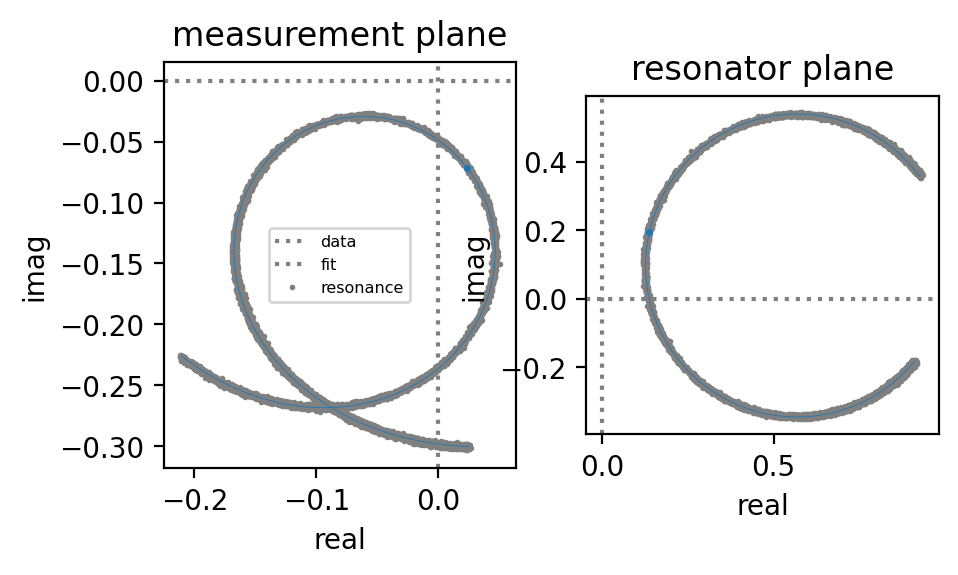

In [58]:
fig, (ax_raw, ax_norm) = plt.subplots(1, 2, figsize=(5, 3), dpi=200)  # Adjust these values for your plot settings
ax_raw.set_title('measurement plane')
ax_norm.set_title('resonator plane')
see.real_and_imaginary(resonator=resonator, axes=ax_raw, normalize=False)
see.real_and_imaginary(resonator=resonator, axes=ax_norm, normalize=True)
ax_raw.legend(handles=ax_raw.lines, labels=('data', 'fit', 'resonance'), fontsize='xx-small');

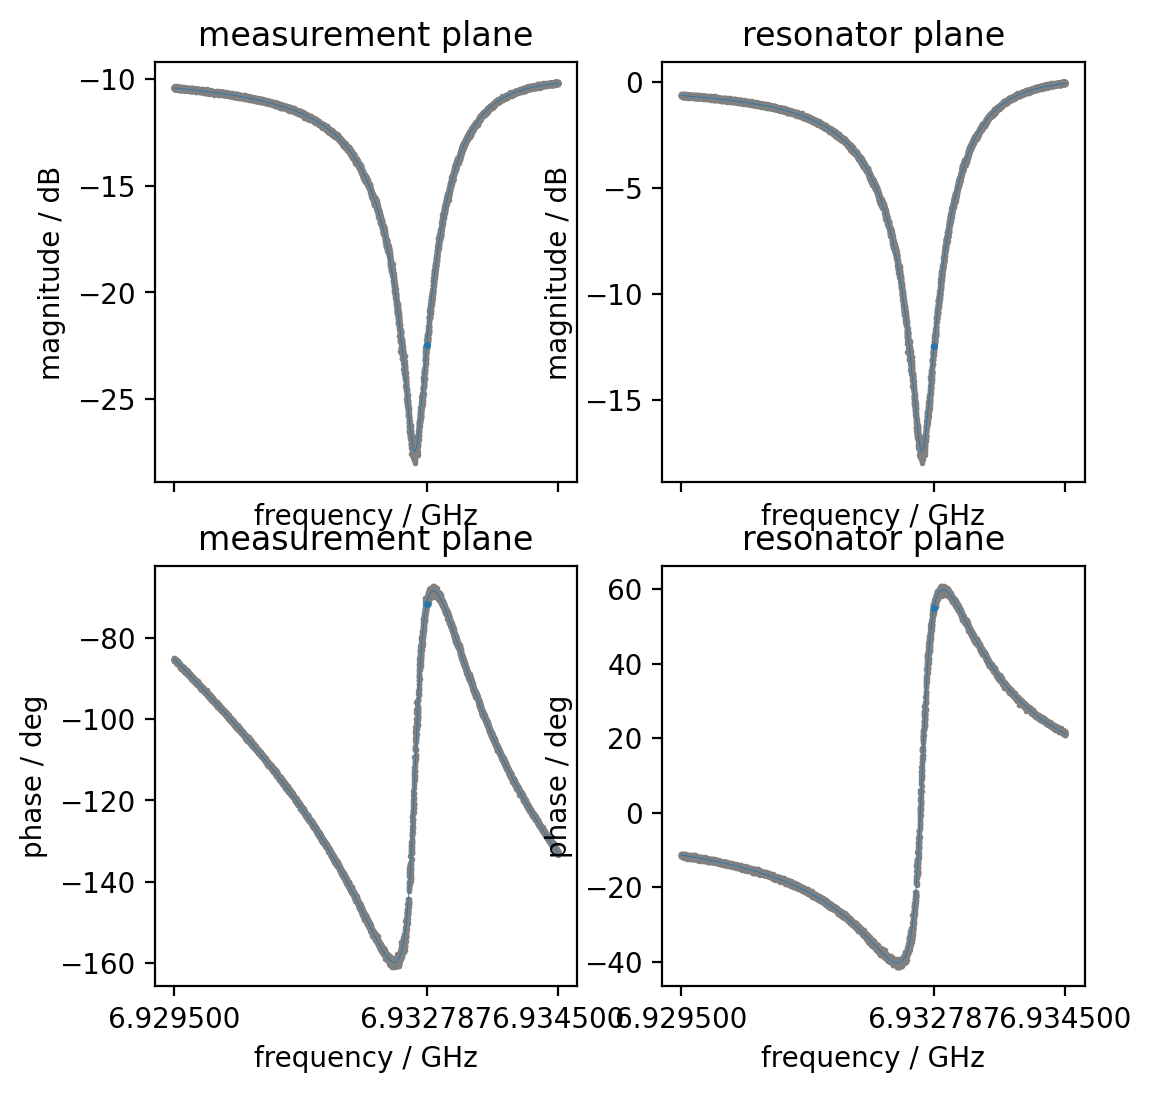

In [59]:
fig, axes = plt.subplots(2, 2, sharex='all', figsize=(6, 6), dpi=200)  # Adjust these values for your plot settings
ax_raw_mag, ax_norm_mag, ax_raw_phase, ax_norm_phase = axes.flatten()
ax_raw_mag.set_title('measurement plane')
ax_norm_mag.set_title('resonator plane')
ax_raw_phase.set_title('measurement plane')
ax_norm_phase.set_title('resonator plane')
see.magnitude_vs_frequency(resonator=resonator, axes=ax_raw_mag, normalize=False, frequency_scale=1e-9)
see.magnitude_vs_frequency(resonator=resonator, axes=ax_norm_mag, normalize=True, frequency_scale=1e-9)
see.phase_vs_frequency(resonator=resonator, axes=ax_raw_phase, normalize=False, frequency_scale=1e-9)
see.phase_vs_frequency(resonator=resonator, axes=ax_norm_phase, normalize=True, frequency_scale=1e-9);

In [65]:
print("The internal quality factor is Q_i = {:.0f}".format(resonator.Q_i))
print("The total quality factor is Q_t = {:.0f}".format(resonator.Q_t))
print("The standard error of the resonance frequency is: {:.0f} Hz".format(resonator.f_r_error))
print("The total energy decay rate is 2 pi f_r / Q_t = {:.0f} s^-1".format(resonator.total_energy_decay_rate))

The internal quality factor is Q_i = 32449
The total quality factor is Q_t = 4451
The standard error of the resonance frequency is: 231 Hz
The total energy decay rate is 2 pi f_r / Q_t = 9786206 s^-1


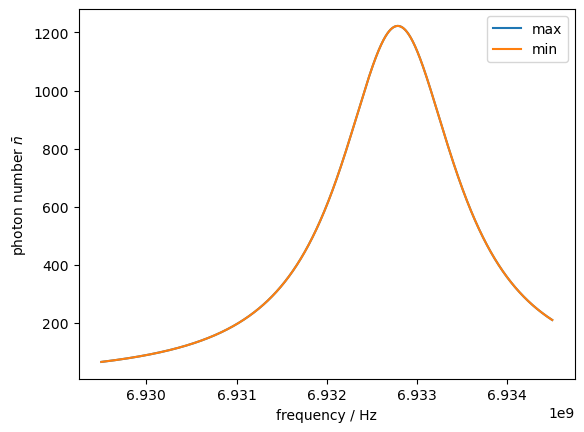

In [60]:

fig, ax = plt.subplots()
ax.set_xlabel('frequency / Hz')
ax.set_ylabel(r'photon number $\bar{n}$')
ax.plot(frequency, resonator.photon_number(input_frequency=frequency, input_rate=resonator.f_r), label='max')
# Calculate the photon number using another root-finding function that selects the minimum Kerr detuning.
# Since the Kerr coefficient is negative here the Kerr detuning is also negative, so choosing the minimum
# (most negative) detuning corresponds to choosing the maximum photon number.
ax.plot(frequency, resonator.photon_number(input_frequency=frequency, input_rate=resonator.f_r), label='min')
ax.legend()
